In [32]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix



import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/breast-cancer-wisconsin-diagnostic-dataset/brca.csv


In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [34]:
# Let's hide warnings
import warnings
warnings.filterwarnings('ignore')

# knowing insights about the dataset

In [35]:
data=pd.read_csv('/kaggle/input/breast-cancer-wisconsin-diagnostic-dataset/brca.csv')
data.pop('Unnamed: 0')
data.head()


,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x.radius_mean        569 non-null    float64
 1   x.texture_mean       569 non-null    float64
 2   x.perimeter_mean     569 non-null    float64
 3   x.area_mean          569 non-null    float64
 4   x.smoothness_mean    569 non-null    float64
 5   x.compactness_mean   569 non-null    float64
 6   x.concavity_mean     569 non-null    float64
 7   x.concave_pts_mean   569 non-null    float64
 8   x.symmetry_mean      569 non-null    float64
 9   x.fractal_dim_mean   569 non-null    float64
 10  x.radius_se          569 non-null    float64
 11  x.texture_se         569 non-null    float64
 12  x.perimeter_se       569 non-null    float64
 13  x.area_se            569 non-null    float64
 14  x.smoothness_se      569 non-null    float64
 15  x.compactness_se     569 non-null    flo

# Checking Missing Values

In [37]:
data.isnull().sum()


x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64

## Checking Summary Statistics


In [38]:
data.describe()


,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Exploratory Data Analysis (EDA)

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

numeric_data = data.select_dtypes(include=[np.number])  # This selects only numeric columns
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Now replace the numeric columns in the original DataFrame
data[numeric_data.columns] = numeric_data_scaled


In [40]:
data.y.unique()


array(['B', 'M'], dtype=object)

# Detect outliers

In [41]:
''''import seaborn as sns
import matplotlib.pyplot as plt

for column in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()'''


"'import seaborn as sns\nimport matplotlib.pyplot as plt\n\nfor column in data.select_dtypes(include=[np.number]).columns:\n    plt.figure(figsize=(7, 5))\n    sns.boxplot(x=data[column])\n    plt.title(f'Box Plot of {column}')\n    plt.show()"

# No of instances per class

In [42]:

class_counts = data['y'].value_counts()
print(class_counts)


y
B    357
M    212
Name: count, dtype: int64


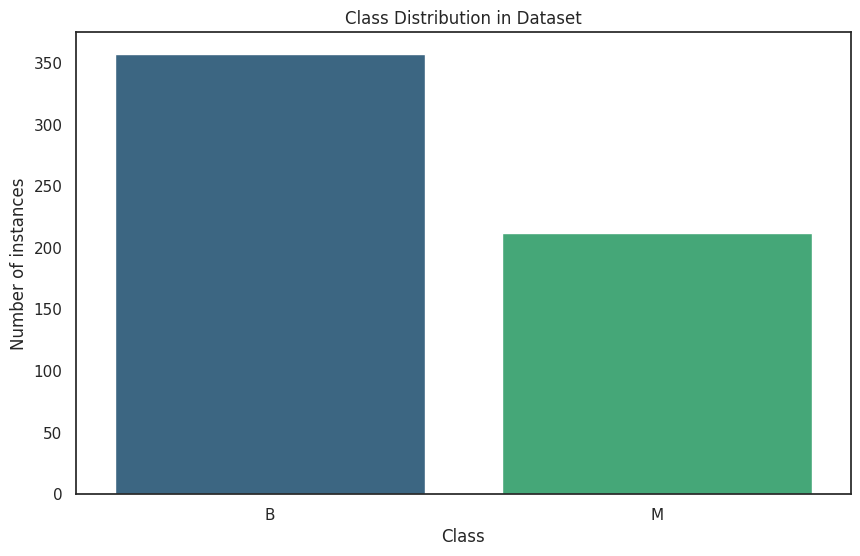

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title('Class Distribution in Dataset')
plt.xlabel('Class')
plt.ylabel('Number of instances')
plt.show()


# Data Preprocessing

# One hot encoding

In [44]:
data['y'] = data['y'].replace(['B', 'M'], [0, 1])


# Correlation Analysis


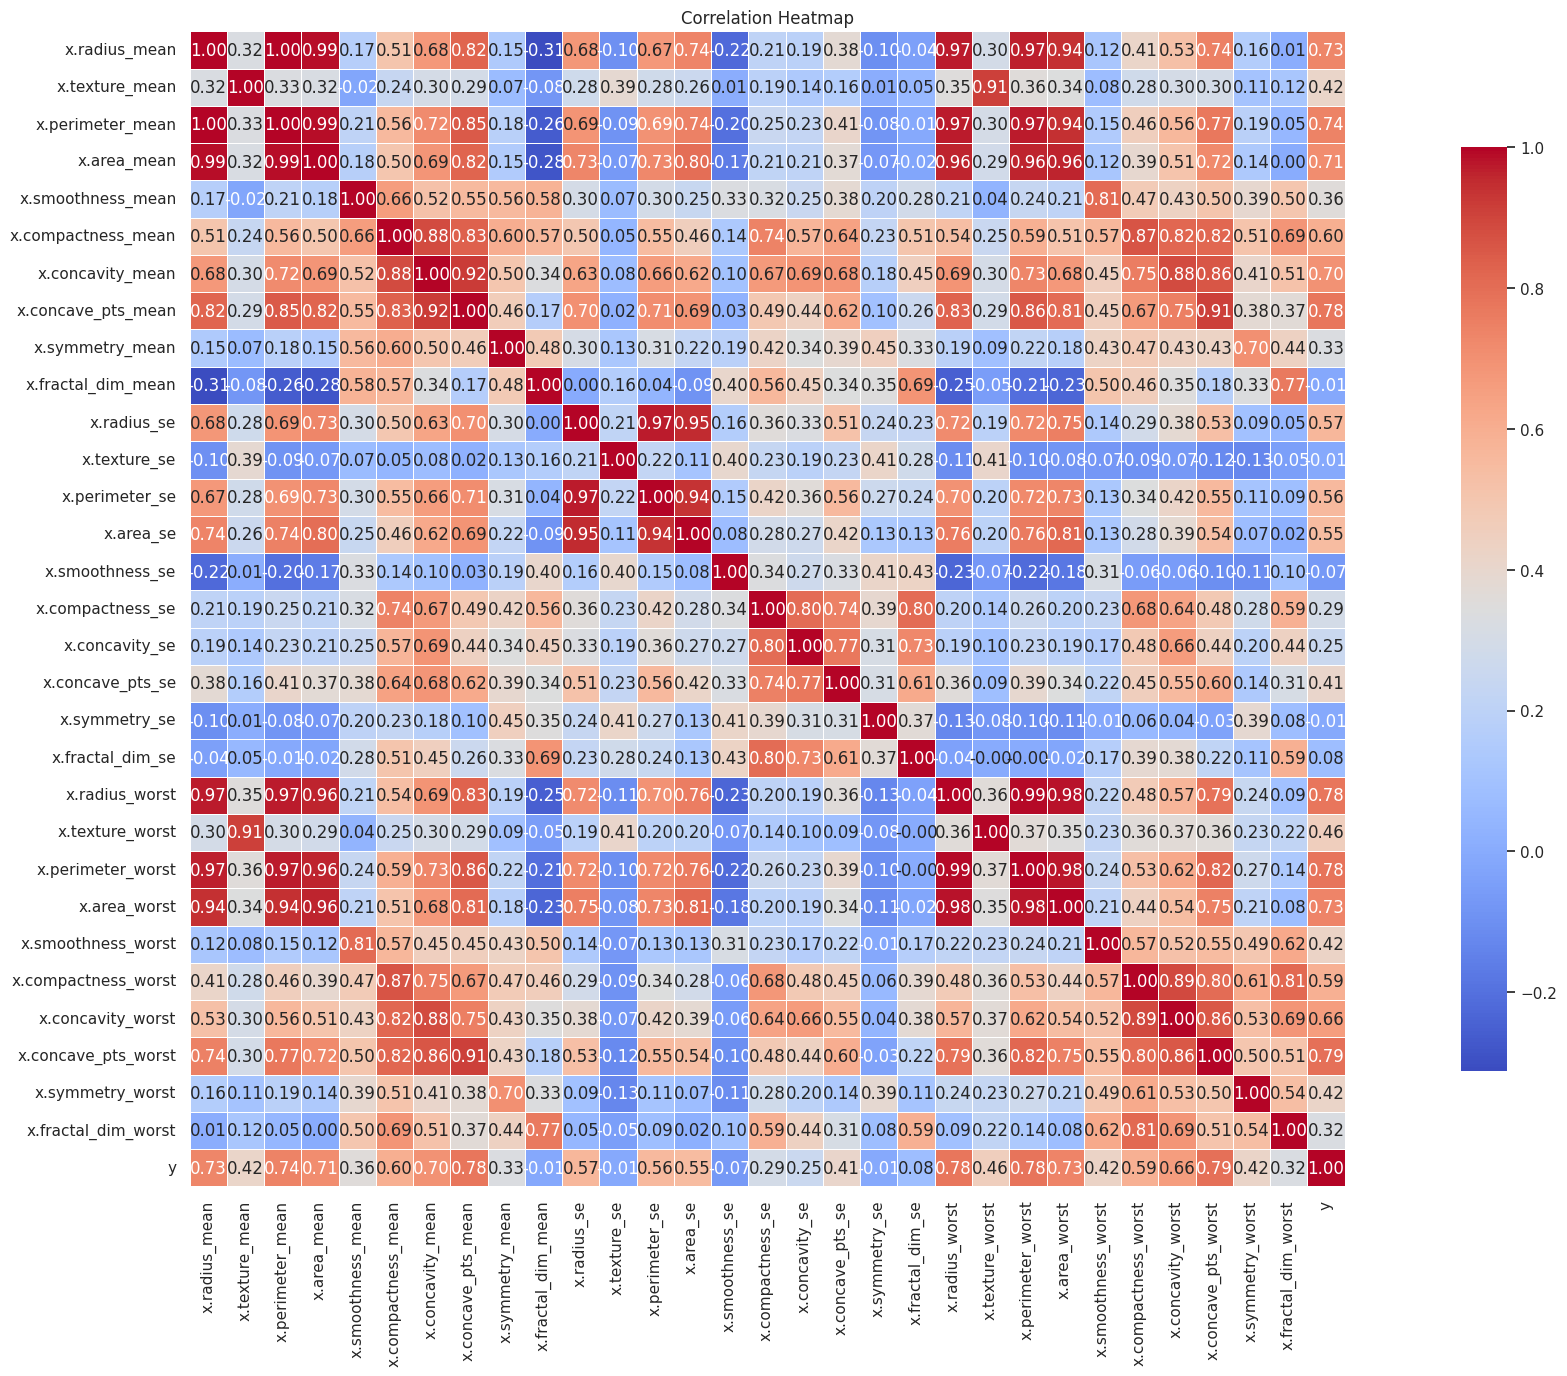

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
# Pearson correlation matrix
correlation_matrix = data.corr()

sns.set_theme(style="white")

plt.figure(figsize=(30, 15)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()


In [46]:
correlation_with_target = correlation_matrix[['y']].drop('y', axis=0)

print(correlation_with_target)

                            y
x.radius_mean        0.730029
x.texture_mean       0.415185
x.perimeter_mean     0.742636
x.area_mean          0.708984
x.smoothness_mean    0.358560
x.compactness_mean   0.596534
x.concavity_mean     0.696360
x.concave_pts_mean   0.776614
x.symmetry_mean      0.330499
x.fractal_dim_mean  -0.012838
x.radius_se          0.567134
x.texture_se        -0.008303
x.perimeter_se       0.556141
x.area_se            0.548236
x.smoothness_se     -0.067016
x.compactness_se     0.292999
x.concavity_se       0.253730
x.concave_pts_se     0.408042
x.symmetry_se       -0.006522
x.fractal_dim_se     0.077972
x.radius_worst       0.776454
x.texture_worst      0.456903
x.perimeter_worst    0.782914
x.area_worst         0.733825
x.smoothness_worst   0.421465
x.compactness_worst  0.590998
x.concavity_worst    0.659610
x.concave_pts_worst  0.793566
x.symmetry_worst     0.416294
x.fractal_dim_worst  0.323872


In [47]:
correlation_with_target.to_csv('correlation_with_target.csv')


In [48]:
from tabulate import tabulate
import pandas as pd

correlation_with_target = correlation_matrix[['y']].drop('y', axis=0)

# Sorting the correlations by absolute value in descending order
correlation_with_target['abs_correlation'] = correlation_with_target['y'].abs()
sorted_correlations = correlation_with_target.sort_values(by='abs_correlation', ascending=False).drop('abs_correlation', axis=1)

# Preparing the data for tabulate
table_data = [(index + ' and y', row['y']) for index, row in sorted_correlations.iterrows()]
headers = ['Attributes\' pairs', 'Correlation coefficient']

print(tabulate(table_data, headers=headers, tablefmt="grid"))


+---------------------------+---------------------------+
| Attributes' pairs         |   Correlation coefficient |
+===========================+===========================+
| x.concave_pts_worst and y |                0.793566   |
+---------------------------+---------------------------+
| x.perimeter_worst and y   |                0.782914   |
+---------------------------+---------------------------+
| x.concave_pts_mean and y  |                0.776614   |
+---------------------------+---------------------------+
| x.radius_worst and y      |                0.776454   |
+---------------------------+---------------------------+
| x.perimeter_mean and y    |                0.742636   |
+---------------------------+---------------------------+
| x.area_worst and y        |                0.733825   |
+---------------------------+---------------------------+
| x.radius_mean and y       |                0.730029   |
+---------------------------+---------------------------+
| x.area_mean 

# Splitting the data

In [49]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42) 

print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))


The size of training data is: 455 
The size of testing data is: 114


In [50]:
print(train_data.columns)
print(test_data.columns)


Index(['x.radius_mean', 'x.texture_mean', 'x.perimeter_mean', 'x.area_mean',
       'x.smoothness_mean', 'x.compactness_mean', 'x.concavity_mean',
       'x.concave_pts_mean', 'x.symmetry_mean', 'x.fractal_dim_mean',
       'x.radius_se', 'x.texture_se', 'x.perimeter_se', 'x.area_se',
       'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst', 'y'],
      dtype='object')
Index(['x.radius_mean', 'x.texture_mean', 'x.perimeter_mean', 'x.area_mean',
       'x.smoothness_mean', 'x.compactness_mean', 'x.concavity_mean',
       'x.concave_pts_mean', 'x.symmetry_mean', 'x.fractal_dim_mean',
       'x.radius_se', 'x.texture_se', 'x.perimeter_se', 'x.area_se',
       'x.smoothness_se', 'x.compactne

In [51]:
# Split features and labels
X_train = train_data.drop('y', axis=1) ## Features only
y_train = train_data['y'] # Labels only
X_test = test_data.drop('y', axis=1)# Features only
y_test = test_data['y'] # Labels only

#  Logistic Regression model

In [52]:
# Training a Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

# Decision Tree model

In [53]:
# Training a Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

# SVM Model

In [54]:
# Training a SVM  model
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

# Evaluating the models with the devault parameters 


In [55]:

models = [lr, dt, svm]
model_names = ['Logistic Regression', 'Decision Tree', 'SVM']

for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    
    # Calculating the metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='binary', pos_label=1)  # '1' is Malignant
    precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
    f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Printing the results
    print(f"{model_names[i]} Results:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")


Logistic Regression Results:
Accuracy: 96.49%
Recall: 0.95
Precision: 0.95
F1-Score: 0.95
Confusion Matrix:
[[69  2]
 [ 2 41]]

Decision Tree Results:
Accuracy: 92.11%
Recall: 0.91
Precision: 0.89
F1-Score: 0.90
Confusion Matrix:
[[66  5]
 [ 4 39]]

SVM Results:
Accuracy: 95.61%
Recall: 0.93
Precision: 0.95
F1-Score: 0.94
Confusion Matrix:
[[69  2]
 [ 3 40]]



#  After 10 cross-validation

In [56]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation
for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_train, y_train, cv=10)
    
    #dividing the training data into 10 folds, training the model on 9 folds and testing it on the 1 remaining fold, rotating until each fold has been used for testing.

Logistic Regression Evaluation:
Logistic Regression Cross-Validation Accuracy: 97.38%
Recall: 95.35%
Precision: 95.35%
F-1 Score: 95.35%


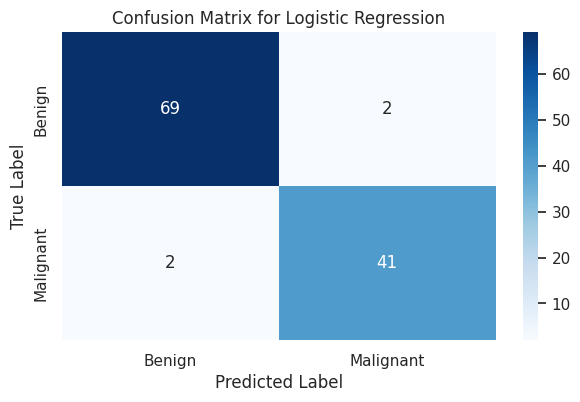

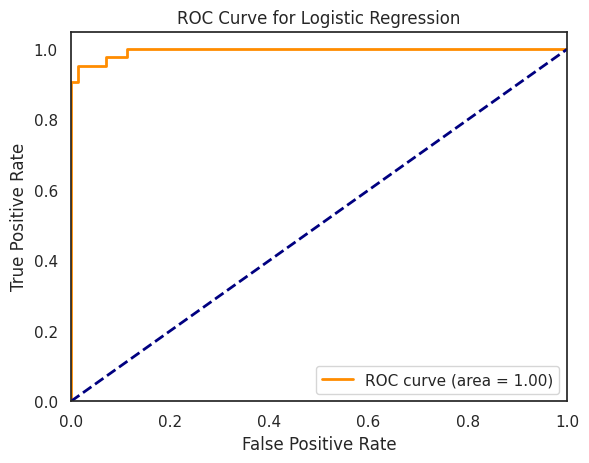

Decision Tree Evaluation:
Decision Tree Cross-Validation Accuracy: 97.38%
Recall: 90.70%
Precision: 88.64%
F-1 Score: 89.66%


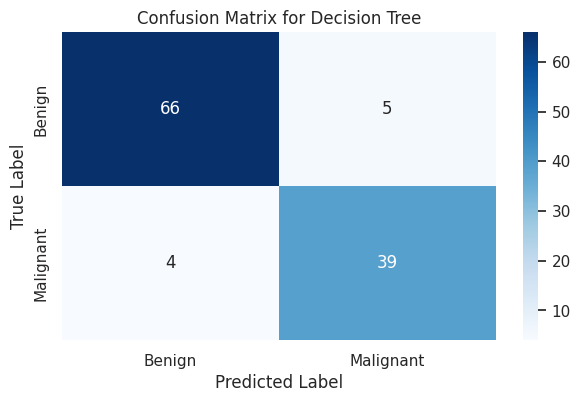

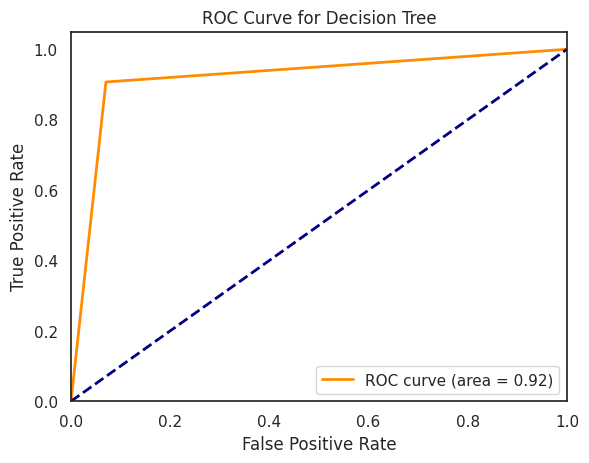

SVM Evaluation:
SVM Cross-Validation Accuracy: 97.38%
Recall: 93.02%
Precision: 95.24%
F-1 Score: 94.12%


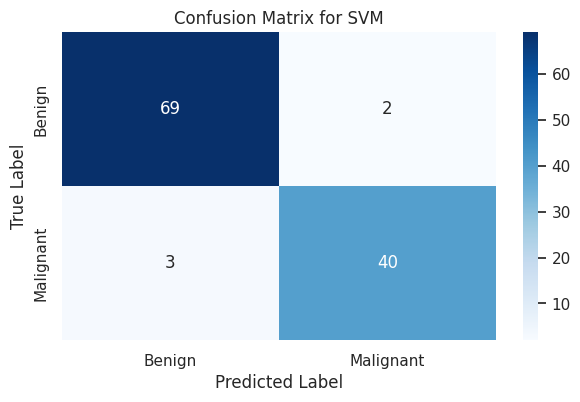

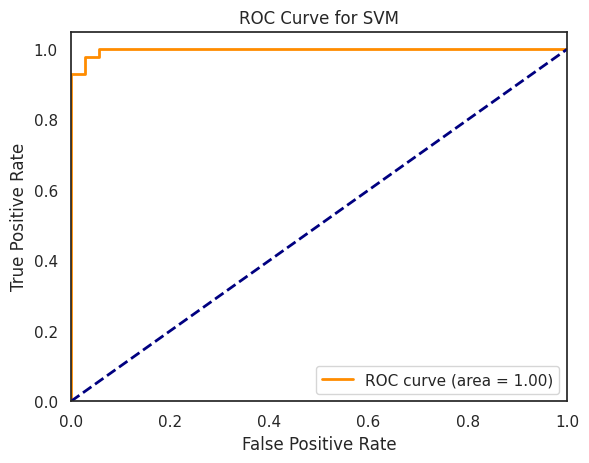

In [58]:
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate models using recall, precision, and F-1 score
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Printing evaluation metrics
    print(f'{name} Evaluation:')
    print(f'{name} Cross-Validation Accuracy: {scores.mean() * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'F-1 Score: {f1 * 100:.2f}%')
    
    # Plotting Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    # Plotting ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()


# Finding the optimal parameters

In [27]:
from sklearn.model_selection import GridSearchCV


# Preparing the hyperparameter grids
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2'],
    'solver': ['lbfgs'],  
    'max_iter': [100, 1000, 5000]
}
dt_params = {
    'max_depth': [None] + list(range(1, 21)),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Creating the models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC()

# Setting up GridSearchCV
lr_gs = GridSearchCV(lr, lr_params, cv=10, scoring='accuracy')
dt_gs = GridSearchCV(dt, dt_params, cv=10, scoring='accuracy')
svm_gs = GridSearchCV(svm, svm_params, cv=10, scoring='accuracy')

# Fitting models to find the best parameters
lr_gs.fit(X_train, y_train)
dt_gs.fit(X_train, y_train)
svm_gs.fit(X_train, y_train)

# Best estimator found
print("Best parameters for Logistic Regression:", lr_gs.best_params_)
print("Best parameters for Decision Tree:", dt_gs.best_params_)
print("Best parameters for SVM:", svm_gs.best_params_)


Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


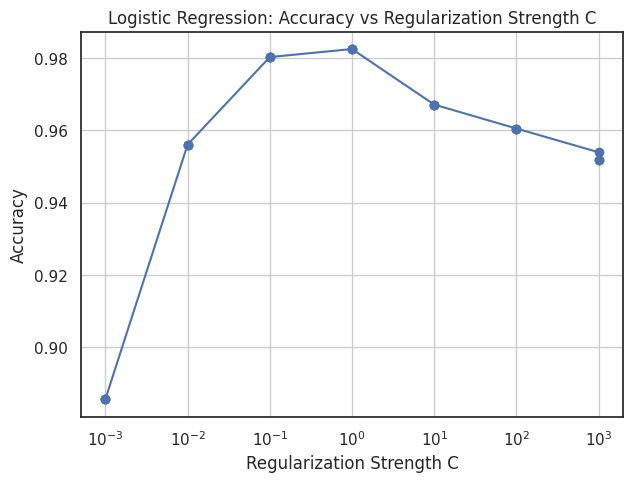

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting C values and corresponding accuracies
C_values = [param['C'] for param in lr_gs.cv_results_['params']]
accuracies = lr_gs.cv_results_['mean_test_score']

# Plotting C vs. Accuracy
plt.figure(figsize=(7, 5))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')  # Logarithmic scale for C values
plt.xlabel('Regularization Strength C')
plt.ylabel('Accuracy')
plt.title('Logistic Regression: Accuracy vs Regularization Strength C')
plt.grid(True)
plt.show()




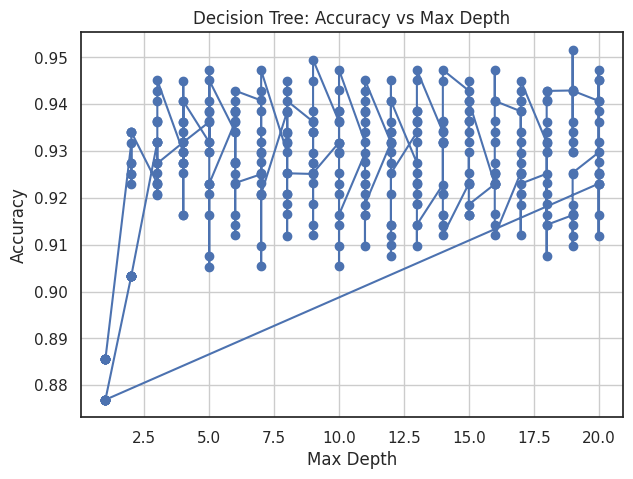

In [29]:
# Extracting max depth values and corresponding accuracies
depths = [param['max_depth'] for param in dt_gs.cv_results_['params'] if param['max_depth'] is not None]  # Excluding None for better visualization
accuracies = [score for param, score in zip(dt_gs.cv_results_['params'], dt_gs.cv_results_['mean_test_score']) if param['max_depth'] is not None]

# Plotting Max Depth vs. Accuracy
plt.figure(figsize=(7, 5))
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Accuracy vs Max Depth')
plt.grid(True)
plt.show()




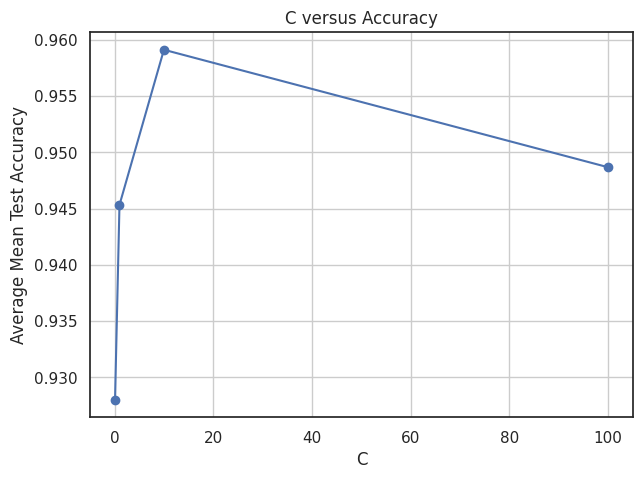

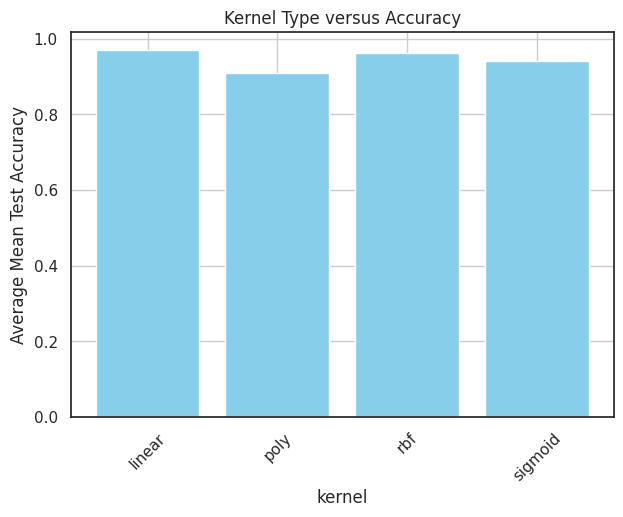

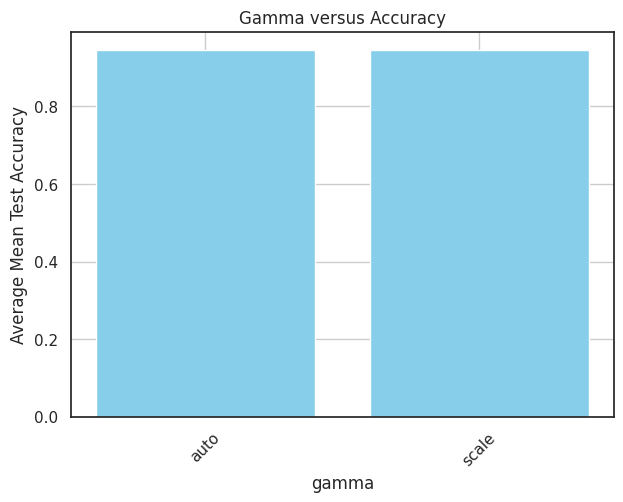

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def plot_parameter_vs_accuracy(results, param_name, title):
    param_values = [d[param_name] for d in results['params']]
    scores = results['mean_test_score']

    param_dict = {}
    for param, score in zip(param_values, scores):
        if param in param_dict:
            param_dict[param].append(score)
        else:
            param_dict[param] = [score]

    # Calculate average scores for each parameter value
    averaged_scores = {k: np.mean(v) for k, v in param_dict.items()}
    sorted_params = sorted(averaged_scores.keys())
    sorted_scores = [averaged_scores[param] for param in sorted_params]

    plt.figure(figsize=(7, 5))
    if isinstance(list(param_dict.keys())[0], str): 
        plt.bar(sorted_params, sorted_scores, color='skyblue')
    else:
        plt.plot(sorted_params, sorted_scores, marker='o', linestyle='-', color='b')
    
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel('Average Mean Test Accuracy')
    plt.xticks(rotation=45 if isinstance(list(param_dict.keys())[0], str) else 0)
    plt.grid(True)
    plt.show()

# Example usage:
plot_parameter_vs_accuracy(svm_gs.cv_results_, 'C', 'C versus Accuracy')
plot_parameter_vs_accuracy(svm_gs.cv_results_, 'kernel', 'Kernel Type versus Accuracy')
plot_parameter_vs_accuracy(svm_gs.cv_results_, 'gamma', 'Gamma versus Accuracy')


# After finding the optimal parameters


In [42]:

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Retrain models with best parameters
lr_best = LogisticRegression(C=1, max_iter=100, penalty='l2', solver='lbfgs')
dt_best = DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=4, min_samples_split=2)
svm_best = SVC(C=0.1, gamma='scale', kernel='linear', probability=True)  # `probability=True` for SVC to use predict_proba required by some metrics

# Fit the models on the training data
lr_best.fit(X_train, y_train)
dt_best.fit(X_train, y_train)
svm_best.fit(X_train, y_train)

# Predict the test set
y_pred_lr = lr_best.predict(X_test)
y_pred_dt = dt_best.predict(X_test)
y_pred_svm = svm_best.predict(X_test)

# Calculate and print metrics for each model
models = [lr_best, dt_best, svm_best]
predictions = [y_pred_lr, y_pred_dt, y_pred_svm]
model_names = ['Logistic Regression', 'Decision Tree', 'SVM']

for i, (model, y_pred) in enumerate(zip(models, predictions)):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='binary', pos_label=1)
    precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
    f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"{model_names[i]} Evaluation:")
    print('-------------------------')
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")


Logistic Regression Evaluation:
-------------------------
Accuracy: 96.49%
Recall: 0.95
Precision: 0.95
F1-Score: 0.95
Confusion Matrix:
[[69  2]
 [ 2 41]]

Decision Tree Evaluation:
-------------------------
Accuracy: 93.86%
Recall: 0.91
Precision: 0.93
F1-Score: 0.92
Confusion Matrix:
[[68  3]
 [ 4 39]]

SVM Evaluation:
-------------------------
Accuracy: 93.86%
Recall: 0.88
Precision: 0.95
F1-Score: 0.92
Confusion Matrix:
[[69  2]
 [ 5 38]]



# Training Ensemble Classifiers

# 1_Voting (Hard/Soft)

In [32]:
from sklearn.ensemble import VotingClassifier #The number of classifiers used in voting must be ODD if the problem is a binary classification as our case
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Hard_voting
# 

Hard Voting Accuracy: 0.95
Recall: 0.91
Precision: 0.95
F1 Score: 0.93

Confusion Matrix:
[[69  2]
 [ 4 39]]


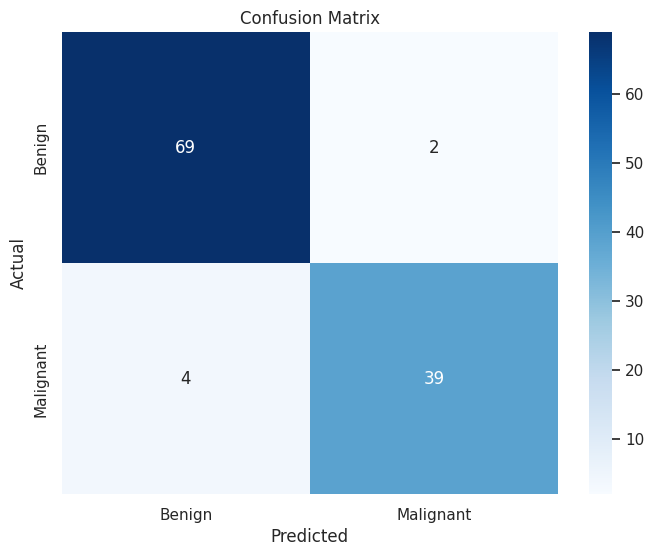

In [44]:


# Create base models
base_model_1 = LogisticRegression(C=1, max_iter=100, penalty='l2', solver='lbfgs')
base_model_2 = SVC(C=0.1, gamma='scale', kernel='linear', probability=True, random_state=42)
base_model_3 = DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=4, min_samples_split=2, random_state=42)

voting_model = VotingClassifier(
    estimators=[('lr', base_model_1), ('svm', base_model_2), ('dt', base_model_3)],
    voting='hard')

# Fit the model
voting_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='binary', pos_label=1)  # Assuming '1' is the positive class
precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)

# Print results
print(f'Hard Voting Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# Soft_voting

Soft Voting Accuracy: 0.96
Recall: 0.93
Precision: 0.95
F1 Score: 0.94

Confusion Matrix:
[[69  2]
 [ 3 40]]


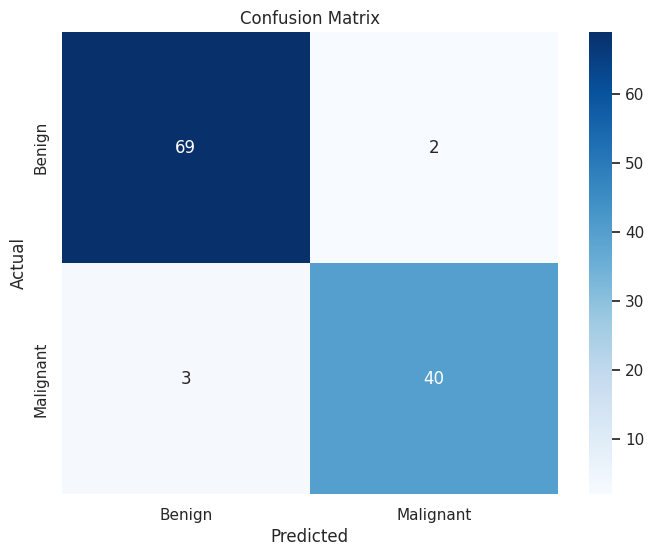

In [46]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Create base models
base_model_1 = LogisticRegression(C=1, max_iter=100, penalty='l2', solver='lbfgs')
base_model_2 = SVC(C=0.1, gamma='scale', kernel='linear', probability=True, random_state=42)
base_model_3 = DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=4, min_samples_split=2, random_state=42)

voting_model = VotingClassifier(
    estimators=[('lr', base_model_1), ('svm', base_model_2), ('dt', base_model_3)],
    voting='soft')

# Fit the model
voting_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='binary', pos_label=1)  # Assuming '1' is the positive class
precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)

# Print results
print(f'Soft Voting Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# 2_Bagging

In [35]:
from sklearn.ensemble import BaggingClassifier

Logistic Regression Bagging Accuracy: 0.97
Recall: 0.98
Precision: 0.95
F1 Score: 0.97

Confusion Matrix:
[[69  2]
 [ 1 42]]


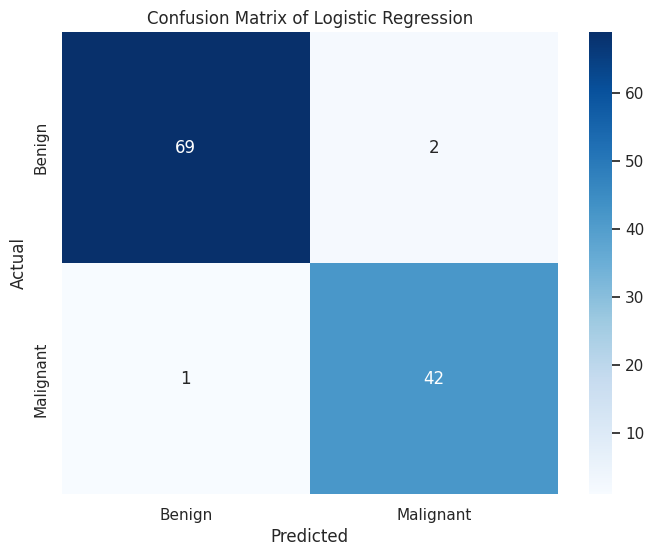

------------------------
SVM Bagging Accuracy: 0.96
Recall: 0.93
Precision: 0.98
F1 Score: 0.95

Confusion Matrix:
[[70  1]
 [ 3 40]]


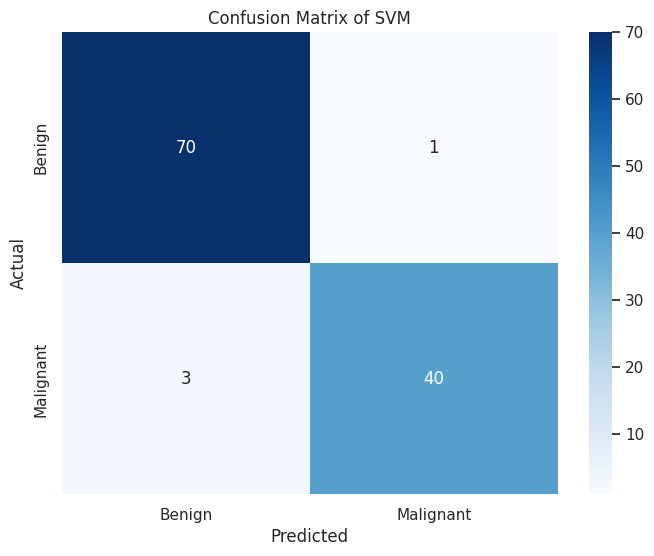

------------------------
Decision Tree Bagging Accuracy: 0.94
Recall: 0.88
Precision: 0.95
F1 Score: 0.92

Confusion Matrix:
[[69  2]
 [ 5 38]]


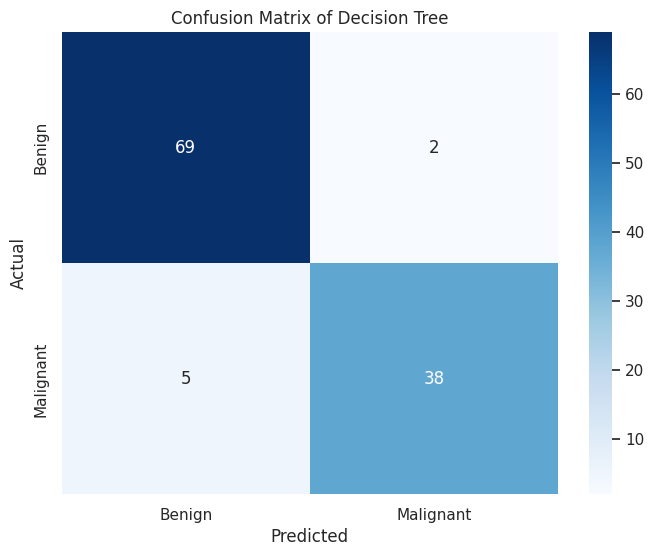

------------------------


In [53]:
base_lr = LogisticRegression(C=1, max_iter=100, penalty='l2', solver='lbfgs', class_weight='balanced', random_state=42)
base_svm = SVC(C=0.1, gamma='scale', kernel='linear', probability=True, class_weight='balanced', random_state=42)
base_dt = DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=4, min_samples_split=2, class_weight='balanced', random_state=42)

# Create bagging classifiers for each model
bagging_lr = BaggingClassifier(base_lr, n_estimators=10, max_samples=0.5, max_features=0.5, bootstrap=True, random_state=42)
bagging_svm = BaggingClassifier(base_svm, n_estimators=10, max_samples=0.5, max_features=0.5, bootstrap=True, random_state=42)
bagging_dt = BaggingClassifier(base_dt, n_estimators=10, max_samples=0.5, max_features=0.5, bootstrap=True, random_state=42)

# Train and evaluate each bagging classifier
models = [(bagging_lr, "Logistic Regression"), (bagging_svm, "SVM"), (bagging_dt, "Decision Tree")]
for model, name in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='binary', pos_label=1)
    precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
    f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f'{name} Bagging Accuracy: {accuracy:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix of {name}')
    plt.show()

    print("------------------------")


# 3_Boosting

In [37]:
from sklearn.ensemble import AdaBoostClassifier #RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Logistic Regression Boosting Accuracy: 0.96
Recall: 0.95
Precision: 0.95
F1 Score: 0.95

Confusion Matrix:
[[69  2]
 [ 2 41]]


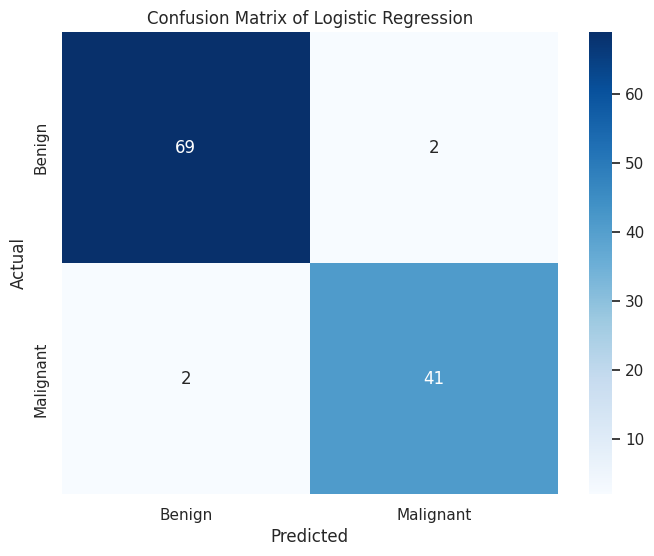

------------------------
SVM Boosting Accuracy: 0.88
Recall: 0.67
Precision: 1.00
F1 Score: 0.81

Confusion Matrix:
[[71  0]
 [14 29]]


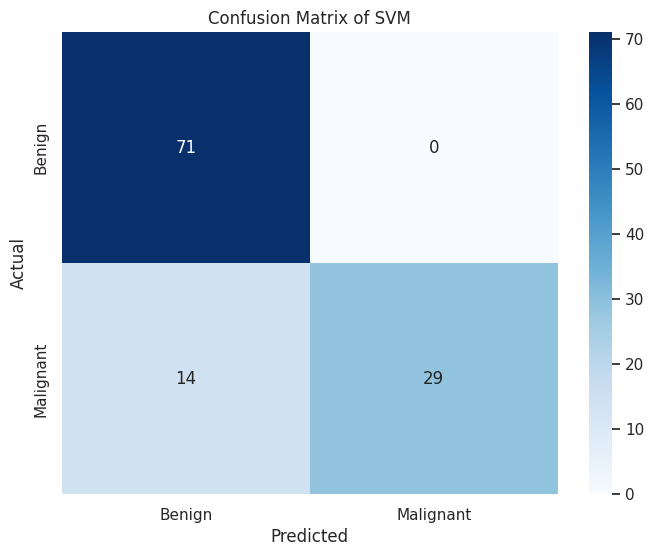

------------------------
Decision Tree Boosting Accuracy: 0.95
Recall: 0.91
Precision: 0.95
F1 Score: 0.93

Confusion Matrix:
[[69  2]
 [ 4 39]]


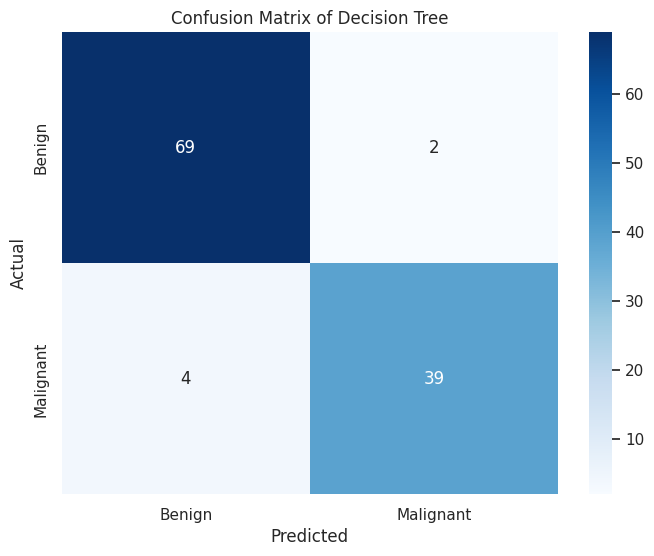

------------------------


In [52]:

# Define base models
base_lr = LogisticRegression(C=1, max_iter=100, penalty='l2', solver='lbfgs', class_weight='balanced', random_state=42)
base_svm = SVC(C=0.1, gamma='scale', kernel='linear', probability=True, class_weight='balanced', random_state=42)
base_dt = DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=4, min_samples_split=2, class_weight='balanced', random_state=42)

# Create AdaBoost classifiers for each model
boosting_lr = AdaBoostClassifier(base_estimator=base_lr, n_estimators=50, random_state=42)
boosting_svm = AdaBoostClassifier(base_estimator=base_svm, n_estimators=50, random_state=42)
boosting_dt = AdaBoostClassifier(base_estimator=base_dt, n_estimators=50, random_state=42)

# List of models
models = [(boosting_lr, "Logistic Regression"), (boosting_svm, "SVM"), (boosting_dt, "Decision Tree")]

# Train and evaluate each boosting classifier
for model, name in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='binary', pos_label=1)
    precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
    f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print results
    print(f'{name} Boosting Accuracy: {accuracy:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print("\nConfusion Matrix:")
    print(conf_matrix)
    
    # Confusion matrix plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix of {name}')
    plt.show()
    print("------------------------")


# 4_Stacking

In [39]:
from sklearn.ensemble import StackingClassifier

Stacking Model Accuracy: 0.96
Recall: 0.95
Precision: 0.95
F1 Score: 0.95

Confusion Matrix:
[[69  2]
 [ 2 41]]


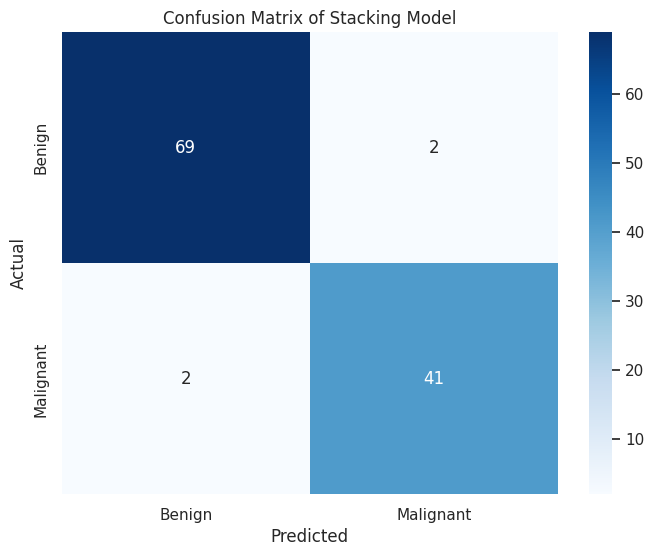

In [54]:

# Tuned base models
base_lr = LogisticRegression(C=1, max_iter=100, penalty='l2', solver='lbfgs', class+', random_state=42)
base_svm = SVC(C=0.1, gamma='scale', kernel='linear', probability=True, class_weight='balanced', random_state=42)
base_dt = DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=4, min_samples_split=2, class_weight='balanced', random_state=42)



stack_model = StackingClassifier(
    estimators=[('lr', base_lr), ('svm', base_svm), ('dt', base_dt)],
    final_estimator=LogisticRegression(),
    passthrough=True,  # Whether to use the original features along with the predictions
    cv=10
)


stack_model.fit(X_train, y_train)

# Make predictions
y_pred = stack_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='binary', pos_label=1)
precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f'Stacking Model Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')
print("\nConfusion Matrix:")
print(conf_matrix)

# Confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix of Stacking Model')
plt.show()

# Features selection 

# Apply RFECV for Each Mode

In [69]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def train_evaluate(model, X_train, y_train, X_test, y_test):
    # Setup RFECV
    rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
    rfecv.fit(X_train, y_train)
    
    # Identify which features were selected by RFECV
    selected_features = X_train.columns[rfecv.support_]
    
    # Retrain the model on the selected features only
    model.fit(X_train[selected_features], y_train)
    
    # Make predictions on the test set using the selected features
    y_pred = model.predict(X_test[selected_features])
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='binary', pos_label=1)  # Adjust pos_label accordingly
    precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
    f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
    conf_mat = confusion_matrix(y_test, y_pred)
    
    print(f'Model: {model.__class__.__name__}')
    print(f'Optimal number of features: {len(selected_features)}')
    print(f'Selected features: {selected_features.tolist()}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{conf_mat}')
    
    # Plotting the confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Return the model, metrics, and selected features for further analysis if needed
    return model, accuracy, recall, precision, f1, selected_features


# Evaluate Models on Different Feature Subsets

Model: LogisticRegression
Optimal number of features: 14
Selected features: ['x.area_mean', 'x.concave_pts_mean', 'x.radius_se', 'x.perimeter_se', 'x.area_se', 'x.compactness_se', 'x.fractal_dim_se', 'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst', 'x.area_worst', 'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst']
Accuracy: 0.9561
Recall: 0.9302
Precision: 0.9524
F1 Score: 0.9412
Confusion Matrix:
[[69  2]
 [ 3 40]]


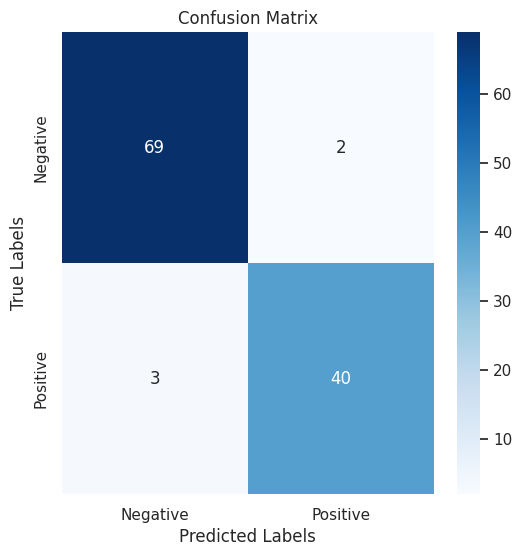

Model: SVC
Optimal number of features: 24
Selected features: ['x.radius_mean', 'x.texture_mean', 'x.perimeter_mean', 'x.area_mean', 'x.compactness_mean', 'x.concavity_mean', 'x.concave_pts_mean', 'x.symmetry_mean', 'x.fractal_dim_mean', 'x.radius_se', 'x.perimeter_se', 'x.area_se', 'x.compactness_se', 'x.concave_pts_se', 'x.fractal_dim_se', 'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst', 'x.area_worst', 'x.smoothness_worst', 'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst', 'x.fractal_dim_worst']
Accuracy: 0.9474
Recall: 0.9070
Precision: 0.9512
F1 Score: 0.9286
Confusion Matrix:
[[69  2]
 [ 4 39]]


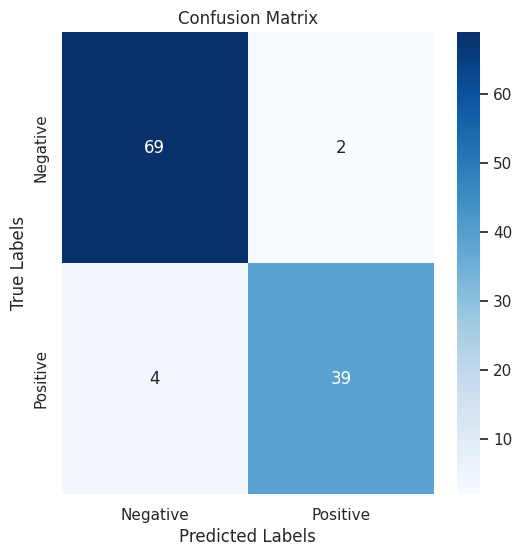

Model: DecisionTreeClassifier
Optimal number of features: 5
Selected features: ['x.texture_worst', 'x.perimeter_worst', 'x.smoothness_worst', 'x.concave_pts_worst', 'x.fractal_dim_worst']
Accuracy: 0.9386
Recall: 0.8605
Precision: 0.9737
F1 Score: 0.9136
Confusion Matrix:
[[70  1]
 [ 6 37]]


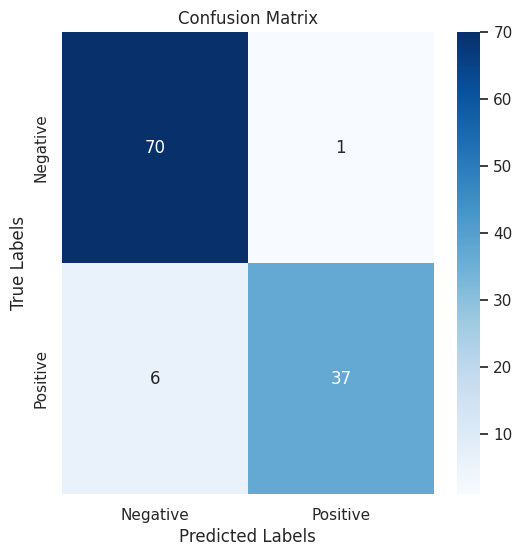

In [71]:
models = [LogisticRegression(C=1, max_iter=100, penalty='l2', solver='lbfgs', random_state=42),
          SVC(C=0.1, gamma='scale', kernel='linear', probability=True, random_state=42),
          DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=4, min_samples_split=2, random_state=42)]

for model in models:
    train_evaluate(model, X_train, y_train, X_test, y_test)


# Using correlation 

In [76]:
# Extracting feature names from the sorted correlations DataFrame
sorted_feature_names = sorted_correlations.index.tolist()

all_features = sorted_feature_names  

# Select the top half of the features
top_half_features = sorted_feature_names[:len(sorted_feature_names) // 2]

# Select the top 2 features
top_2_features = sorted_feature_names[:2]

# Select the top 5 features
top_5_features = sorted_feature_names[:5]

# Print the selected feature subsets
print("All Features:", all_features)
print("Top Half Features:", top_half_features)
print("Top 2 Features:", top_2_features)
print("Top 5 Features:", top_5_features)


All Features: ['x.concave_pts_worst', 'x.perimeter_worst', 'x.concave_pts_mean', 'x.radius_worst', 'x.perimeter_mean', 'x.area_worst', 'x.radius_mean', 'x.area_mean', 'x.concavity_mean', 'x.concavity_worst', 'x.compactness_mean', 'x.compactness_worst', 'x.radius_se', 'x.perimeter_se', 'x.area_se', 'x.texture_worst', 'x.smoothness_worst', 'x.symmetry_worst', 'x.texture_mean', 'x.concave_pts_se', 'x.smoothness_mean', 'x.symmetry_mean', 'x.fractal_dim_worst', 'x.compactness_se', 'x.concavity_se', 'x.fractal_dim_se', 'x.smoothness_se', 'x.fractal_dim_mean', 'x.texture_se', 'x.symmetry_se']
Top Half Features: ['x.concave_pts_worst', 'x.perimeter_worst', 'x.concave_pts_mean', 'x.radius_worst', 'x.perimeter_mean', 'x.area_worst', 'x.radius_mean', 'x.area_mean', 'x.concavity_mean', 'x.concavity_worst', 'x.compactness_mean', 'x.compactness_worst', 'x.radius_se', 'x.perimeter_se', 'x.area_se']
Top 2 Features: ['x.concave_pts_worst', 'x.perimeter_worst']
Top 5 Features: ['x.concave_pts_worst', 'x

Training LogisticRegression with all_features
Model: LogisticRegression, using features: 30
Accuracy: 0.9649, Recall: 0.9535, Precision: 0.9535, F1 Score: 0.9535
Confusion Matrix:
[[69  2]
 [ 2 41]]



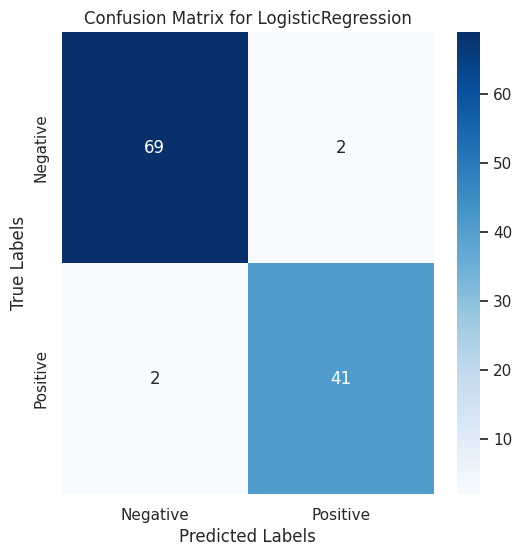

Training LogisticRegression with top_half_features
Model: LogisticRegression, using features: 15
Accuracy: 0.9386, Recall: 0.9070, Precision: 0.9286, F1 Score: 0.9176
Confusion Matrix:
[[68  3]
 [ 4 39]]



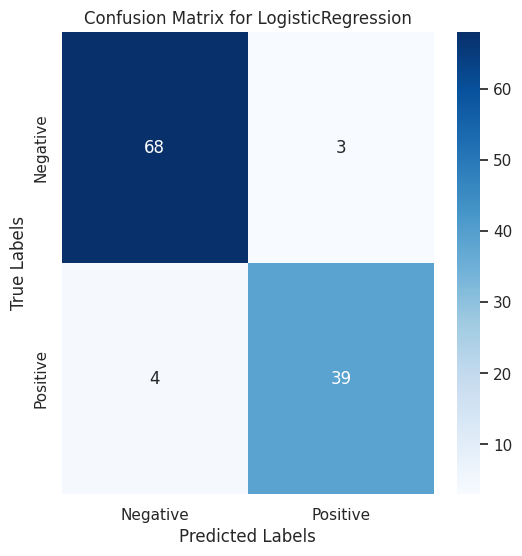

Training LogisticRegression with top_2_features
Model: LogisticRegression, using features: 2
Accuracy: 0.9298, Recall: 0.8605, Precision: 0.9487, F1 Score: 0.9024
Confusion Matrix:
[[69  2]
 [ 6 37]]



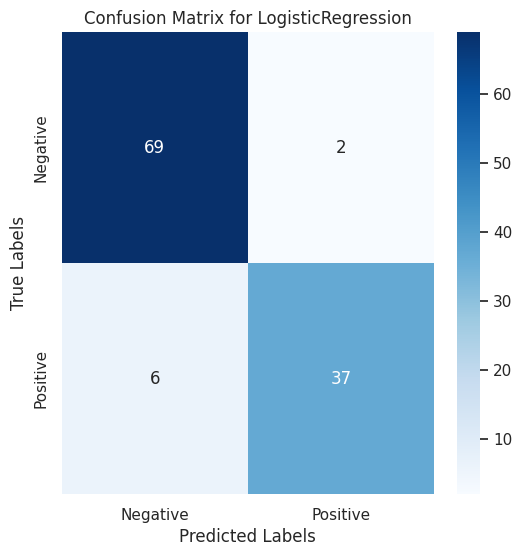

Training LogisticRegression with top_5_features
Model: LogisticRegression, using features: 5
Accuracy: 0.9386, Recall: 0.8605, Precision: 0.9737, F1 Score: 0.9136
Confusion Matrix:
[[70  1]
 [ 6 37]]



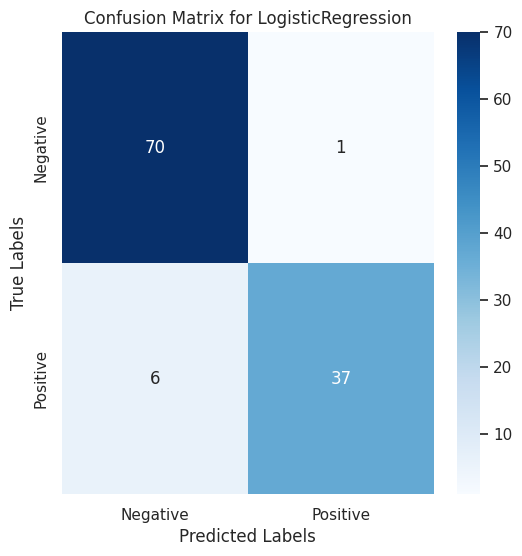

Training SVC with all_features
Model: SVC, using features: 30
Accuracy: 0.9386, Recall: 0.8837, Precision: 0.9500, F1 Score: 0.9157
Confusion Matrix:
[[69  2]
 [ 5 38]]



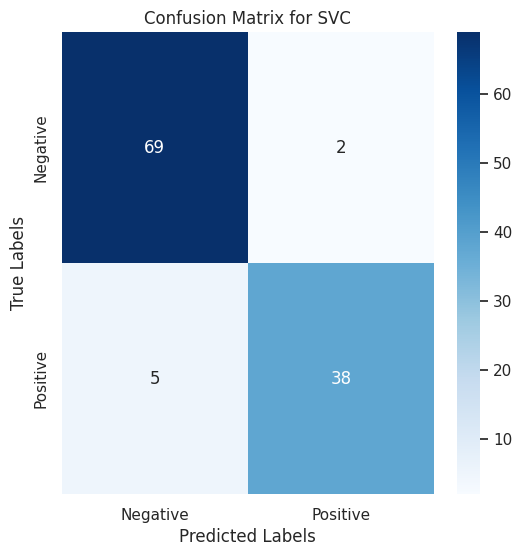

Training SVC with top_half_features
Model: SVC, using features: 15
Accuracy: 0.9386, Recall: 0.8605, Precision: 0.9737, F1 Score: 0.9136
Confusion Matrix:
[[70  1]
 [ 6 37]]



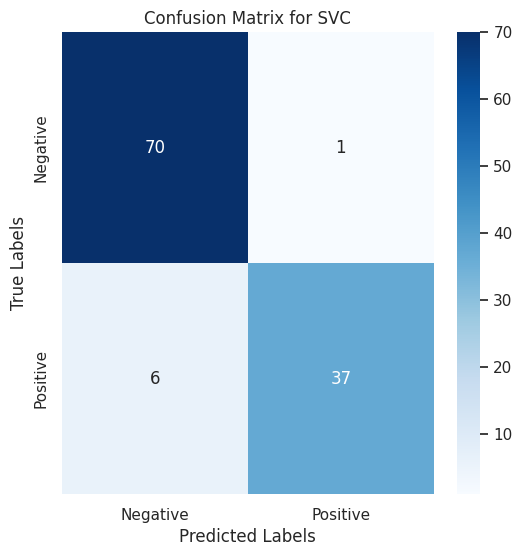

Training SVC with top_2_features
Model: SVC, using features: 2
Accuracy: 0.9298, Recall: 0.8605, Precision: 0.9487, F1 Score: 0.9024
Confusion Matrix:
[[69  2]
 [ 6 37]]



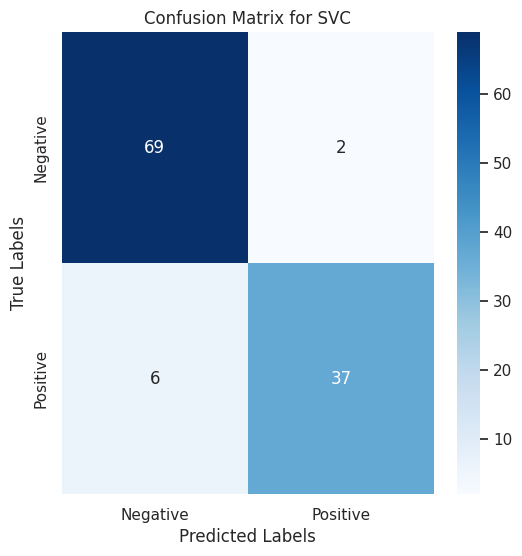

Training SVC with top_5_features
Model: SVC, using features: 5
Accuracy: 0.9386, Recall: 0.8605, Precision: 0.9737, F1 Score: 0.9136
Confusion Matrix:
[[70  1]
 [ 6 37]]



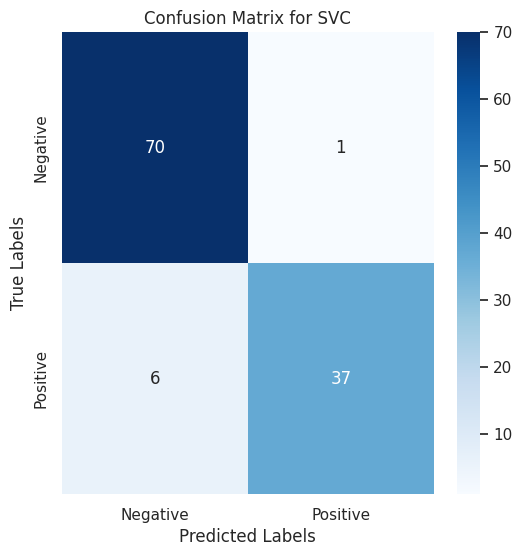

Training DecisionTreeClassifier with all_features
Model: DecisionTreeClassifier, using features: 30
Accuracy: 0.9386, Recall: 0.9070, Precision: 0.9286, F1 Score: 0.9176
Confusion Matrix:
[[68  3]
 [ 4 39]]



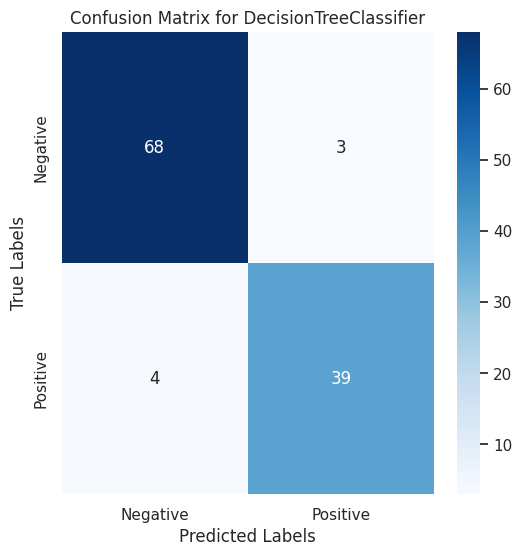

Training DecisionTreeClassifier with top_half_features
Model: DecisionTreeClassifier, using features: 15
Accuracy: 0.9474, Recall: 0.8837, Precision: 0.9744, F1 Score: 0.9268
Confusion Matrix:
[[70  1]
 [ 5 38]]



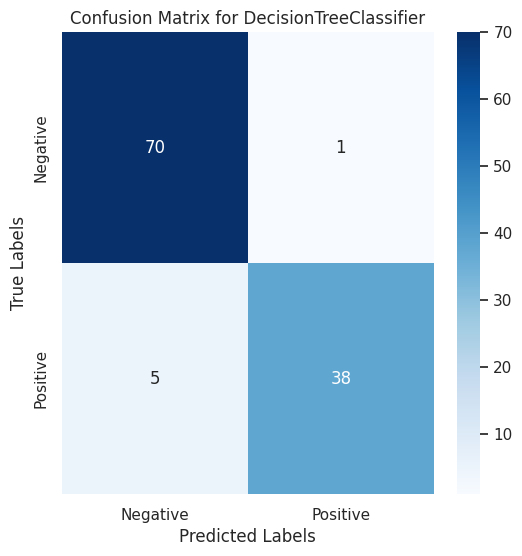

Training DecisionTreeClassifier with top_2_features
Model: DecisionTreeClassifier, using features: 2
Accuracy: 0.9211, Recall: 0.8605, Precision: 0.9250, F1 Score: 0.8916
Confusion Matrix:
[[68  3]
 [ 6 37]]



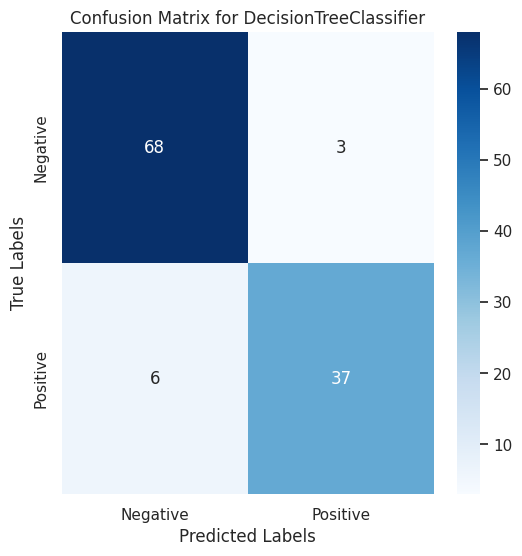

Training DecisionTreeClassifier with top_5_features
Model: DecisionTreeClassifier, using features: 5
Accuracy: 0.9386, Recall: 0.8605, Precision: 0.9737, F1 Score: 0.9136
Confusion Matrix:
[[70  1]
 [ 6 37]]



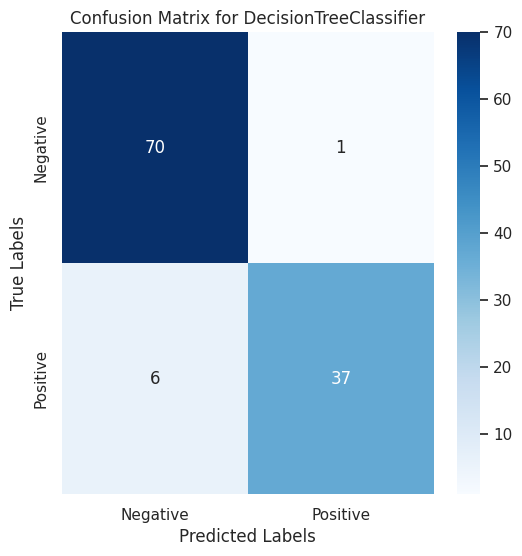

In [75]:


def train_evaluate2(model, features, X_train, y_train, X_test, y_test):
    # Train the model on the selected features only
    model.fit(X_train[features], y_train)
    
    # Make predictions on the test set using the selected features
    y_pred = model.predict(X_test[features])
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='binary', pos_label=1)  # Adjust pos_label accordingly
    precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
    f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
    conf_mat = confusion_matrix(y_test, y_pred)
    
    # Print and visualize results
    print(f'Model: {model.__class__.__name__}, using features: {len(features)}')
    print(f'Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{conf_mat}\n')
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

# Define feature subsets based on correlation
all_features = sorted_correlations.index.tolist()
top_half_features = sorted_correlations.index[:len(all_features)//2].tolist()
top_2_features = sorted_correlations.index[:2].tolist()
top_5_features = sorted_correlations.index[:5].tolist()

# Models list
models = [
    LogisticRegression(C=1, max_iter=100, penalty='l2', solver='lbfgs', random_state=42),
    SVC(C=0.1, gamma='scale', kernel='linear', probability=True, random_state=42),
    DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=4, min_samples_split=2, random_state=42)
]

# Evaluate each model on different feature subsets
feature_sets = {
    "all_features": all_features,
    "top_half_features": top_half_features,
    "top_2_features": top_2_features,
    "top_5_features": top_5_features
}

for model in models:
    for name, features in feature_sets.items():
        print(f"Training {model.__class__.__name__} with {name}")
        train_evaluate2(model, features, X_train, y_train, X_test, y_test)
